In [ ]:
# Label Encoding Comparison in Supply Chain Dataset

In this notebook, we explore how different label encoding techniques affect a sample supply chain dataset.

Encoding types:
- Label Encoding (Integer)
- One-Hot Encoding
- Ordinal Encoding

We will visualize the transformed DataFrames for clarity.


In [3]:
import pandas as pd

# Sample categorical dataset: Warehouse shipments
df = pd.DataFrame({
    'Warehouse': ['East', 'West', 'South', 'East', 'North', 'West'],
    'Priority': ['High', 'Low', 'Medium', 'Medium', 'High', 'Low'],
    'Product_Category': ['Electronics', 'Furniture', 'Food', 'Food', 'Electronics', 'Furniture']
})

print("Original DataFrame:")
df


Original DataFrame:


,Warehouse,Priority,Product_Category
0,East,High,Electronics
1,West,Low,Furniture
2,South,Medium,Food
3,East,Medium,Food
4,North,High,Electronics
5,West,Low,Furniture


In [5]:
from sklearn.preprocessing import LabelEncoder

# Create a copy for label encoding
df_label = df.copy()

# Apply Label Encoding to all categorical columns
le = LabelEncoder()
for col in df_label.columns:
    df_label[col] = le.fit_transform(df_label[col])

print("Label Encoded DataFrame:")
df_label


Label Encoded DataFrame:


,Warehouse,Priority,Product_Category
0,0,0,0
1,3,1,2
2,2,2,1
3,0,2,1
4,1,0,0
5,3,1,2


In [7]:
from sklearn.preprocessing import OrdinalEncoder

# Define a meaningful order for 'Priority'
priority_order = ['Low', 'Medium', 'High']
ordinal = OrdinalEncoder(categories=[['East', 'West', 'South', 'North'], 
                                     priority_order,
                                     ['Electronics', 'Furniture', 'Food']])

df_ordinal = pd.DataFrame(
    ordinal.fit_transform(df),
    columns=df.columns
)

print("Ordinal Encoded DataFrame (custom order):")
df_ordinal


Ordinal Encoded DataFrame (custom order):


,Warehouse,Priority,Product_Category
0,0.0,2.0,0.0
1,1.0,0.0,1.0
2,2.0,1.0,2.0
3,0.0,1.0,2.0
4,3.0,2.0,0.0
5,1.0,0.0,1.0


In [9]:
df_onehot = pd.get_dummies(df)

print("One-Hot Encoded DataFrame:")
df_onehot


One-Hot Encoded DataFrame:


,Warehouse_East,Warehouse_North,Warehouse_South,Warehouse_West,Priority_High,Priority_Low,Priority_Medium,Product_Category_Electronics,Product_Category_Food,Product_Category_Furniture
0,True,False,False,False,True,False,False,True,False,False
1,False,False,False,True,False,True,False,False,False,True
2,False,False,True,False,False,False,True,False,True,False
3,True,False,False,False,False,False,True,False,True,False
4,False,True,False,False,True,False,False,True,False,False
5,False,False,False,True,False,True,False,False,False,True


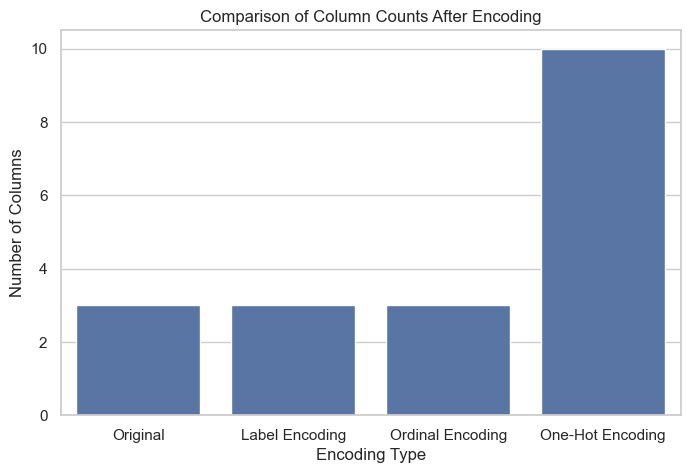

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Visual comparison of number of columns
encoding_methods = {
    "Original": df,
    "Label Encoding": df_label,
    "Ordinal Encoding": df_ordinal,
    "One-Hot Encoding": df_onehot
}

column_counts = {k: v.shape[1] for k, v in encoding_methods.items()}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(column_counts.keys()), y=list(column_counts.values()))
plt.title("Comparison of Column Counts After Encoding")
plt.ylabel("Number of Columns")
plt.xlabel("Encoding Type")
plt.show()


In [ ]:
### Summary of Encoding Effects

| Encoding Type    | Preserves Category Info | Implies Order | Model Compatibility         |
|------------------|-------------------------|---------------|-----------------------------|
| Label Encoding   | ✅                      | ❌            | Tree-based (may mislead)    |
| Ordinal Encoding | ✅                      | ✅            | Ordinal-sensitive models     |
| One-Hot Encoding | ✅                      | ❌            | Linear / Distance models     |

Choose encoding based on:
- Model type
- Whether the categorical variable has natural ordering
- Number of unique values (One-Hot is inefficient with many)
